# diabet Data 다루기 // Regression 회귀!!

In [23]:
from sklearn import datasets
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error # RMSE mean_squared_error에 루트를 씌운거 (값이 너무크니까)

In [2]:
diabets = datasets.load_diabetes()

In [3]:
diabets

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [4]:
df = pd.DataFrame(diabets.data, columns = diabets.feature_names)

In [5]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [6]:
df['target'] = diabets.target

In [7]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [13]:
df['target'].unique()

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144., 168.,  68.,  49., 245.,
       184., 202., 137.,  85., 131., 283., 129.,  59., 341.,  87.,  65.,
       102., 265., 276., 252.,  90., 100.,  55.,  61.,  92., 259.,  53.,
       190., 142., 155., 225., 104., 182., 128.,  52.,  37., 170.,  71.,
       163., 150., 160., 178.,  48., 270., 111.,  42., 200., 113., 143.,
        51., 210., 134.,  98., 164.,  96., 162., 279.,  83., 302., 198.,
        95., 232.,  81., 246., 297., 258., 229., 275., 281., 173., 180.,
        84., 121., 161.,  99., 109., 115., 268., 274., 158., 107., 103.,
       272., 280., 336., 317., 235.,  60., 174., 126., 288.,  88., 292.,
       197., 186.,  25., 195., 217., 172., 214.,  70., 220., 152.,  47.,
        74., 295., 127., 237.,  64.,  79.,  91., 116.,  86., 122.,  72.,
        39., 196., 222., 277.,  77., 191.,  73., 263., 248., 296.,  78.,
        93., 208., 108., 154., 124.,  67., 257., 26

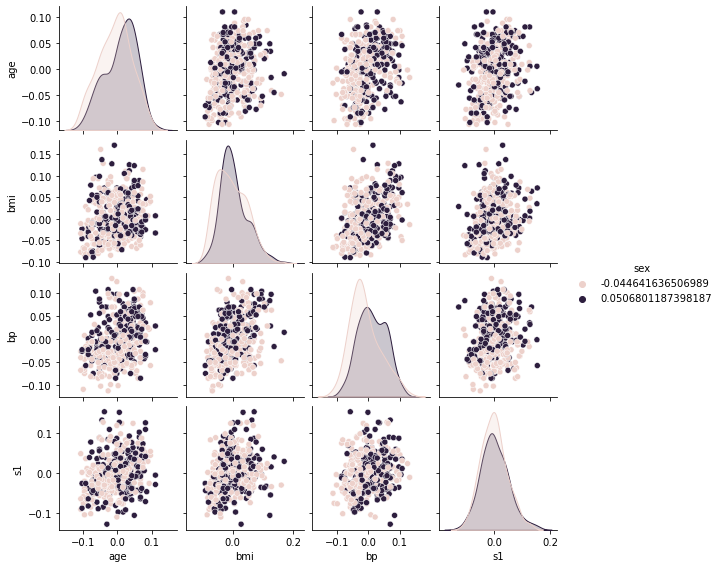

In [16]:
sns.pairplot(df[['age','sex','bmi','bp','s1']], height=2, hue='sex') # 성별로 나누는게 큰 의미는 없는 듯?

## 1. 모델 비교하기

In [32]:
X = df.drop('target', axis=1)

In [19]:
Y = df['target']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)

In [21]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(331, 10) (331,)
(111, 10) (111,)


In [24]:
models = {'KNN' : KNeighborsRegressor(n_neighbors=3), 'linerg': LinearRegression()}

In [30]:
for name, model in models.items() :   #그냥 모델이 아닌 model.items() 를써야 dict의 key, value값을 꺼내 for구문에서 쓸 수 있음
    #print(name, model)
    model.fit(x_train, y_train)
    pred= model.predict(x_test)
    score= np.sqrt(mean_squared_error(pred, y_test))
    print("{:>6s} : {:0.2f}".format(name, score)) # 왼쪽 문자열은 글자까지 // 오른쪽 숫자는 소수점 두자리까지 
    # 수치가 작을수록 더 정확한 예측이다 따라서 KNN보다는 linerg가 더 좋은 모델

   KNN : 65.05
linerg : 56.39
